<a href="https://colab.research.google.com/github/thaonguyen274/Machine-Learning-2/blob/main/W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài 1: Xây dựng lại bài toán t-SNE. Tính đạo hàm loss với các parameter (y) trong bài toán t-SNE


t-SNE minimizes the Kullback-Leibler divergence between the joint probabilities $p_{i j}$ in the highdimensional space and the joint probabilities $q_{i j}$ in the low-dimensional space.
The values of $p_{i j}$ are defined to be the symmetrized conditional probabilities, whereas the values of $q_{i j}$ are obtained by means of a Student-t distribution with one degree of freedom
$$
\begin{array}{c}
p_{i j}=\frac{p_{j \mid i}+p_{i \mid j}}{2 n} \\
q_{i j}=\frac{\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}}{\sum_{k \neq l}\left(1+\left\|y_{k}-y_{l}\right\|^{2}\right)^{-1}}
\end{array}
$$
The values of $p_{i i}$ and $q_{i i}$ are set to zero. The Kullback-Leibler divergence between the two joint probability distributions $P$ and $Q$ is given by
$$
\begin{aligned}
C=K L(P \| Q) &=\sum_{i} \sum_{j} p_{i j} \log \frac{p_{i j}}{q_{i j}} \\
&=\sum_{i} \sum_{j} p_{i j} \log p_{i j}-p_{i j} \log q_{i j}
\end{aligned}
$$
In order to make the derivation less cluttered, we define two auxiliary variables $d_{i j}$ and $Z$ as follows
$$
\begin{array}{c}
d_{i j}=\left\|y_{i}-y_{j}\right\|, \\
Z=\sum_{k \neq l}\left(1+d_{k l}^{2}\right)^{-1} .
\end{array}
$$
Note that if $y_{i}$ changes, the only pairwise distances that change are $d_{i j}$ and $d_{j i}$ for $\forall j$. Hence, the gradient of the cost function $C$ with respect to $y_{i}$ is given by
$$
\begin{aligned}
\frac{\delta C}{\delta y_{i}} &=\sum_{j}\left(\frac{\delta C}{\delta d_{i j}}+\frac{\delta C}{\delta d_{j i}}\right)\left(y_{i}-y_{j}\right) \\
&=2 \sum_{j} \frac{\delta C}{\delta d_{i j}}\left(y_{i}-y_{j}\right)
\end{aligned}
$$
The gradient $\frac{\delta C}{\delta d_{i}}$ is computed from the definition of the Kullback-Leibler divergence in Equation 6 (note that the first part of this equation is a constant).
$$
\begin{aligned}
\frac{\delta C}{\delta d_{i j}} &=-\sum_{k \neq l} p_{k l} \frac{\delta\left(\log q_{k l}\right)}{\delta d_{i j}} \\
&=-\sum_{k \neq l} p_{k l} \frac{\delta\left(\log q_{k l} Z-\log Z\right)}{\delta d_{i j}} \\
&=-\sum_{k \neq l} p_{k l}\left(\frac{1}{q_{k l} Z} \frac{\delta\left(\left(1+d_{k l}^{2}\right)^{-1}\right)}{\delta d_{i j}}-\frac{1}{Z} \frac{\delta Z}{\delta d_{i j}}\right)
\end{aligned}
$$
The gradient $\frac{\delta\left(\left(1+d_{j)}^{2}\right)^{-1}\right)}{\delta d_{i j}}$ is only nonzero when $k=i$ and $l=j$. Hence, the gradient $\frac{\delta C}{\delta d_{i j}}$ is given by
$$
\frac{\delta C}{\delta d_{i j}}=2 \frac{p_{i j}}{q_{i j} Z}\left(1+d_{i j}^{2}\right)^{-2}-2 \sum_{k \neq l} p_{k l} \frac{\left(1+d_{i j}^{2}\right)^{-2}}{Z}
$$
Noting that $\sum_{k \neq l} p_{k l}=1$, we see that the gradient simplifies to
$$
\begin{aligned}
\frac{\delta C}{\delta d_{i j}} &=2 p_{i j}\left(1+d_{i j}^{2}\right)^{-1}-2 q_{i j}\left(1+d_{i j}^{2}\right)^{-1} \\
&=2\left(p_{i j}-q_{i j}\right)\left(1+d_{i j}^{2}\right)^{-1}
\end{aligned}
$$
We obtain the gradient:
$$
\frac{\delta C}{\delta y_{i}}=4 \sum_{j}\left(p_{i j}-q_{i j}\right)\left(1+\left\|y_{i}-y_{j}\right\|^{2}\right)^{-1}\left(y_{i}-y_{j}\right) .
$$

# Bài 2: Dùng t-SNE (sklearn) giảm chiều dữ liệu MNIST về 2 chiều, so sánh chuyện giảm chiều PCA và t-SNE.

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data
y = mnist.target

In [16]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y 

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
X = StandardScaler().fit_transform(X)
X_embedded = TSNE(n_components=2, random_state=0).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


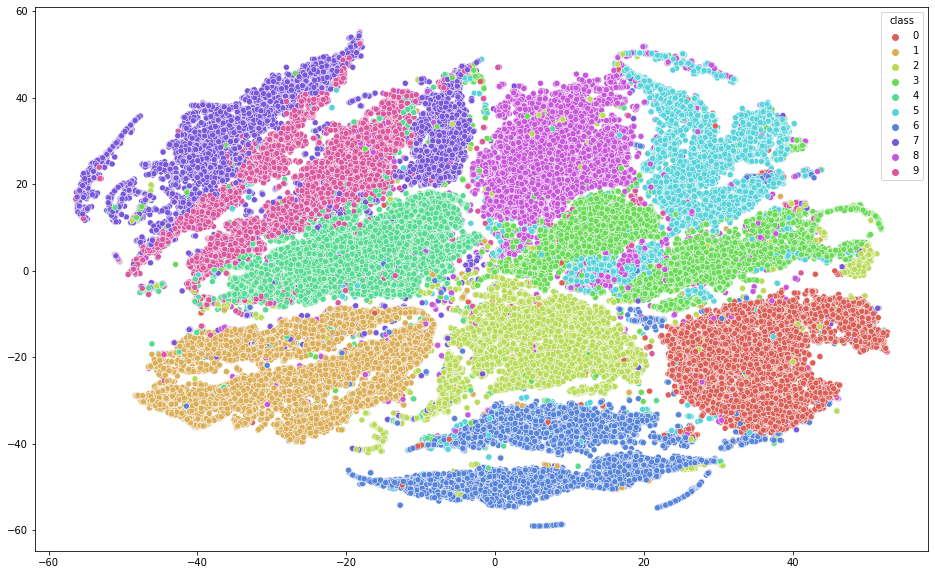

In [19]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = y, palette = sns.hls_palette(10), legend = 'full');


In [20]:
pca = PCA(n_components=2)
pca = pca.fit_transform(X)

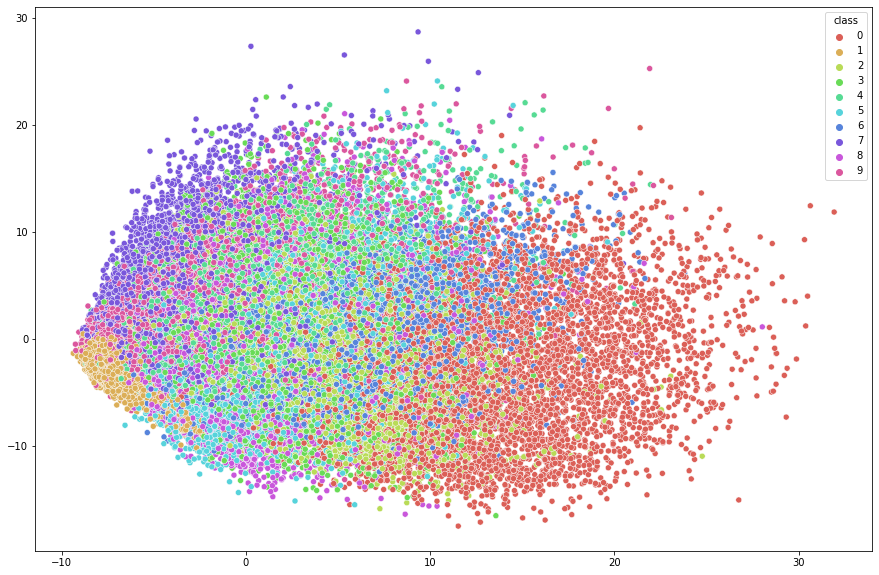

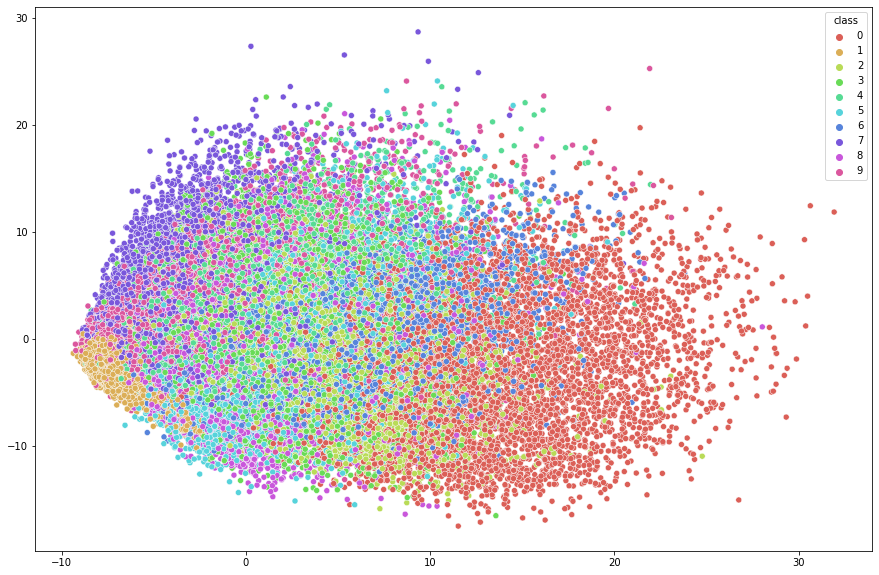

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x= pca[:, 0], y = pca[:, 1], hue = y, palette = sns.hls_palette(10), legend = 'full');